In [1]:
import scraper2 as s
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
import mibian
m = s.stockMongo()

In [5]:
tick = "AAPL"
dates = options.get_expiration_dates(tick)
print(len(dates))
print(dates[14])
prices = options.get_options_chain(tick, dates[7])
price_calls = pd.DataFrame.from_dict(prices['puts'])
print(price_calls)

16
January 20, 2023
           Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0    AAPL210416P00055000   2020-12-31 2:07PM EST    55.0        0.11    0.00   
1    AAPL210416P00060000   2020-12-31 2:08PM EST    60.0        0.16    0.10   
2    AAPL210416P00062500   2020-12-29 9:39AM EST    62.5        0.19    0.14   
3    AAPL210416P00065000  2020-12-31 11:38AM EST    65.0        0.20    0.03   
4    AAPL210416P00067500  2020-12-31 10:12AM EST    67.5        0.25    0.21   
..                   ...                     ...     ...         ...     ...   
110  AAPL210416P00550000   2020-08-24 8:41AM EST   550.0       88.80   94.60   
111  AAPL210416P00555000   2020-08-26 1:40PM EST   555.0       95.65   97.95   
112  AAPL210416P00565000  2020-08-27 11:53AM EST   565.0      109.70  105.00   
113  AAPL210416P00580000   2020-08-24 8:45AM EST   580.0      111.10  115.80   
114  AAPL210416P01000000   2020-08-27 8:30AM EST  1000.0      495.40  503.50   

        Ask  Change

In [12]:
apple = m.get_options("TSLA")
apple.tail()

,% Change,Ask,Bid,Change,Contract Name,Implied Volatility,Last Price,Last Trade Date,Open Interest,Strike,Volume,strike-date,type
date,,,,,,,,,,,,,
2020-12-31,-,0.0,0.0,0,TSLA230120P00700000,0.20%,368.05,2020-11-05 12:20PM EST,0.0,700.0,6.0,2023-01-20,put
2020-12-31,-,0.0,0.0,0,TSLA230120P00750000,0.00%,408.00,2020-11-09 2:21PM EST,0.0,750.0,5.0,2023-01-20,put
2020-12-31,-,0.0,0.0,0,TSLA230120P00800000,0.00%,463.00,2020-11-05 11:20AM EST,0.0,800.0,1.0,2023-01-20,put
2020-12-31,-,0.0,0.0,0,TSLA230120P00850000,0.00%,496.00,2020-11-06 9:45AM EST,0.0,850.0,1.0,2023-01-20,put
2020-12-31,-,0.0,0.0,0,TSLA230120P00900000,0.00%,539.50,2020-11-09 2:31PM EST,0.0,900.0,1.0,2023-01-20,put


In [8]:
apple.loc[apple['Contract Name'] == 'AAPL210115C00128000']

,% Change,Ask,Bid,Change,Contract Name,Implied Volatility,Last Price,Last Trade Date,Open Interest,Strike,Volume,strike-date,type
date,,,,,,,,,,,,,


In [13]:
a = apple.loc['2020-12-31 00:00:00']
b = a.loc[a['Open Interest'] > 0]
b

,% Change,Ask,Bid,Change,Contract Name,Implied Volatility,Last Price,Last Trade Date,Open Interest,Strike,Volume,strike-date,type
date,,,,,,,,,,,,,
2020-12-31,-,240.0,222.3,0,TSLA230120P00520000,98.17%,249.94,2020-10-05 1:50PM EST,3.0,520.0,2.0,2023-01-20,put


In [69]:
#c = mibian.BS([8572, 8700, 0, 31], callPrice= 616.05).impliedVolatility
def iv(p):
    a = 200
    b = 200
    c = 5
    d = 2
    #return mibian.BS([p['c'], p['Strike'], 0, float(p['days'])], callPrice=p['Last Price']).impliedVolatility
    return mibian.BS([p['c'], p['Strike'], 0, p['days']], callPrice= p['Last Price']).impliedVolatility

In [71]:
price_calls['iv'] = price_calls.apply(iv, axis=1)
price_calls.tail()


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,c,days,iv
51,AAPL201127C00155000,2020-11-19 11:06AM EST,155.0,0.01,0.01,0.01,0.0,-,94,2723,71.88%,117.34,5,85.9375
52,AAPL201127C00160000,2020-11-20 11:49AM EST,160.0,0.01,0.00,0.01,0.0,-,1,514,75.00%,117.34,5,93.7500
53,AAPL201127C00165000,2020-11-18 3:25PM EST,165.0,0.01,0.00,0.01,0.0,-,1,156,81.25%,117.34,5,101.5625
54,AAPL201127C00170000,2020-11-18 3:25PM EST,170.0,0.01,0.00,0.01,0.0,-,11,353,87.50%,117.34,5,109.3750
55,AAPL201127C00175000,2020-11-20 3:53PM EST,175.0,0.01,0.00,0.01,0.0,-,3,256,93.75%,117.34,5,117.1875


In [5]:
new_apple = apple
#new_apple = apple.where(apple['Last Trade Date']==apple.index.date).dropna()
#new_apple = new_apple[new_apple['volume'] > 50]
#new_apple['last'] = (new_apple['ask'] + new_apple['bid'])/2


In [17]:
new_apple

,ask,bid,contract,in-money,iv,last,last_trade,strike,strike-date,type,volume
date,,,,,,,,,,,
2020-08-02 23:39:37.026,196.10,194.20,AAPL200918C00230000,in-the-money,65.04%,194.15,2020-07-31,230.0,2020-09-18,Call,228.0
2020-08-02 23:39:37.026,156.30,153.80,AAPL200918C00270000,in-the-money,69.97%,149.18,2020-07-31,270.0,2020-09-18,Call,83.0
2020-08-02 23:39:37.026,137.45,133.85,AAPL200918C00290000,in-the-money,53.27%,134.55,2020-07-31,290.0,2020-09-18,Call,62.0
2020-08-02 23:39:37.026,126.45,123.30,AAPL200918C00300000,in-the-money,57.10%,125.55,2020-07-31,300.0,2020-09-18,Call,584.0
2020-08-02 23:39:37.026,117.70,114.25,AAPL200918C00310000,in-the-money,60.43%,114.83,2020-07-31,310.0,2020-09-18,Call,112.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19 20:21:08.791,0.00,0.00,AAPL230120C00220000,in-the-money,6.25%,4.90,2020-11-10,220.0,2023-01-20,Call,288.0
2020-11-19 20:21:08.791,0.00,0.00,AAPL230120P00050000,in-the-money,12.50%,1.53,2020-11-09,50.0,2023-01-20,Put,77.0
2020-11-19 20:21:08.791,0.00,0.00,AAPL230120P00105000,in-the-money,1.56%,17.20,2020-11-09,105.0,2023-01-20,Put,109.0


In [45]:
def split(apple):
    if apple['date'] < datetime.datetime.fromisoformat('2020-08-31'):
        return apple['c'] * 4
    else:
        return apple['c']

In [6]:
new_apple = apple.reset_index()
new_apple['time'] = new_apple['strike-date'] - new_apple['date']
new_apple['iv'] = pd.Series(new_apple['iv']).str.replace('%', '0', regex=False)
new_apple['iv'] = pd.to_numeric(new_apple['iv'],errors='coerce')
new_apple.head()

KeyError: 'iv'

In [58]:
new_apple = new_apple.reset_index()
new_apple = new_apple.drop(['volume', 'in-money', 'bid', 'ask','last_trade', 'contract', 'index'], axis=1)
#new_apple = new_apple.set_index(['strike-date', 'type'])
new_apple['date'] = pd.to_datetime(new_apple['date']).dt.strftime('%m-%d-%Y')
new_apple['date'] = pd.to_datetime(new_apple['date'])
new_apple.head()

,date,iv,last,strike,strike-date,type,time
0,2020-08-02,148.44,284.24,95.0,2020-09-18,Call,46 days 00:20:22.974000
1,2020-08-02,0.00,254.30,100.0,2020-09-18,Call,46 days 00:20:22.974000
2,2020-08-02,152.54,264.25,105.0,2020-09-18,Call,46 days 00:20:22.974000
3,2020-08-02,129.69,266.25,110.0,2020-09-18,Call,46 days 00:20:22.974000
4,2020-08-02,0.00,255.30,115.0,2020-09-18,Call,46 days 00:20:22.974000


In [48]:
#new_apple = new_apple.reset_index()

new_apple['date'] = new_apple['date'].dt.normalize()
new_apple = pd.merge(new_apple, apl[['c', 'date']], on='date')
#apple2 = apple2.set_index('date')
new_apple['c'] = new_apple.apply(split, axis=1)
new_apple.head()

,date,iv,last,strike,strike-date,type,time,c
0,2020-08-03,219.48,272.27,170.0,2020-08-21,Call,17 days 03:57:58.005000,435.75
1,2020-08-03,210.65,206.99,180.0,2020-08-21,Call,17 days 03:57:58.005000,435.75
2,2020-08-03,0.00,175.69,190.0,2020-08-21,Call,17 days 03:57:58.005000,435.75
3,2020-08-03,193.31,194.12,195.0,2020-08-21,Call,17 days 03:57:58.005000,435.75
4,2020-08-03,189.79,167.15,200.0,2020-08-21,Call,17 days 03:57:58.005000,435.75


c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


120
2020-12-11 00:00:00
        date  121.0  122.0  123.0  124.0  125.0  126.0  127.0  128.0  129.0  \
0 2020-11-11   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   
1 2020-11-12   3.31   3.10   2.61   2.24   2.05   1.76   1.47   1.28   1.04   
2 2020-11-13   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   
3 2020-11-14   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   
4 2020-11-15   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   
5 2020-11-16   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   
6 2020-11-17   2.59   2.28   2.04   1.72   1.48   1.29   1.13   0.98   0.97   

   130.0  135.0  140.0  145.0  150.0  155.0  160.0  165.0  170.0  
0   0.76   0.42   0.24   0.16   0.12   0.12   0.07   0.03   0.03  
1   0.95   0.43   0.22   0.15   0.11   0.07   0.06   0.05   0.04  
2   0.76   0.42   0.24   0.16   0.12   0.12   0.07   0.03   0.03  
3   0.76   0.42   0.24   0.16   0.12   0.12   0.07   0.03   0.03  
4   0.76

<Figure size 432x288 with 0 Axes>

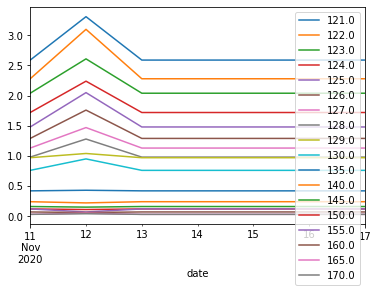

In [60]:
start = time.time()
new_apple6 = []
ivol = []
k = 18

strike_pivot = new_apple.pivot_table(columns="strike-date", values="date", aggfunc=np.count_nonzero)
strike_cols = strike_pivot.columns

new_apple2 = new_apple.reset_index()
new_apple2 = new_apple2.set_index(['type', 'strike-date'])

apple_pivot_call = new_apple2.loc[('Call', strike_cols[k])]
strike_pivot = apple_pivot_call.pivot_table(columns="strike", values="date", aggfunc=np.count_nonzero)
strike_value_cols = strike_pivot.columns
apple_pivot_put = new_apple2.loc[('Put', strike_cols[k])]
strike_pivot = apple_pivot_put.pivot_table(columns="strike", values="date", aggfunc=np.count_nonzero)
strike_value_puts = strike_pivot.columns
#c = new_apple2['c'].mean()
c =120

cols = strike_value_cols[strike_value_cols > c]
puts = strike_value_puts[strike_value_puts < c]

puts = cols
apple_pivot_put = apple_pivot_call

df = apple_pivot_put[apple_pivot_put['strike'] == puts[0]]
d = puts[0]
df.rename(columns = {'last':str(d)}, inplace = True)
df = df[['date', str(d)]]

for i in range(1,len(puts)):
    df1 = apple_pivot_put[apple_pivot_put['strike'] == puts[i]]
    df = pd.merge(df, df1[['date', 'last']], on='date')
    df.rename(columns = {'last': str(puts[i])}, inplace = True)

print(c)
print(strike_cols[k])
print(df)
df = df.set_index('date')
plt.figure(); df.plot(); plt.legend(loc='best')


In [70]:
new_apple6['mean'] = new_apple6['mean'].astype(np.uint8)
new_apple6['std'] = new_apple6['std'].astype(np.uint8)
new_apple6['iv'] = new_apple6['iv'].astype(np.uint8)
new_apple6['prob'] = new_apple6['prob'].astype(np.uint8)

In [16]:
cols

Float64Index([122.5, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0,
              165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0,
              210.0, 215.0, 220.0, 225.0, 230.0, 240.0, 250.0, 260.0, 270.0,
              280.0, 290.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0,
              335.0, 340.0, 345.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0,
              410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0,
              500.0, 520.0, 540.0, 560.0, 580.0, 600.0, 620.0, 640.0, 660.0,
              680.0, 700.0, 720.0, 740.0, 800.0, 900.0],
             dtype='float64', name='strike')

In [53]:
new_apple6[new_apple6['day']>30].dropna()['condor-change']

45   -0.002066
46   -0.002070
47   -0.002075
48   -0.002079
49   -0.002083
        ...   
25   -0.000909
26   -0.000910
27   -0.000911
28   -0.000912
29   -0.000912
Name: condor-change, Length: 18844, dtype: float64

In [24]:
new_apple[new_apple['time'].dt.days == 60]

,date,iv,last,strike,strike-date,type,time,c


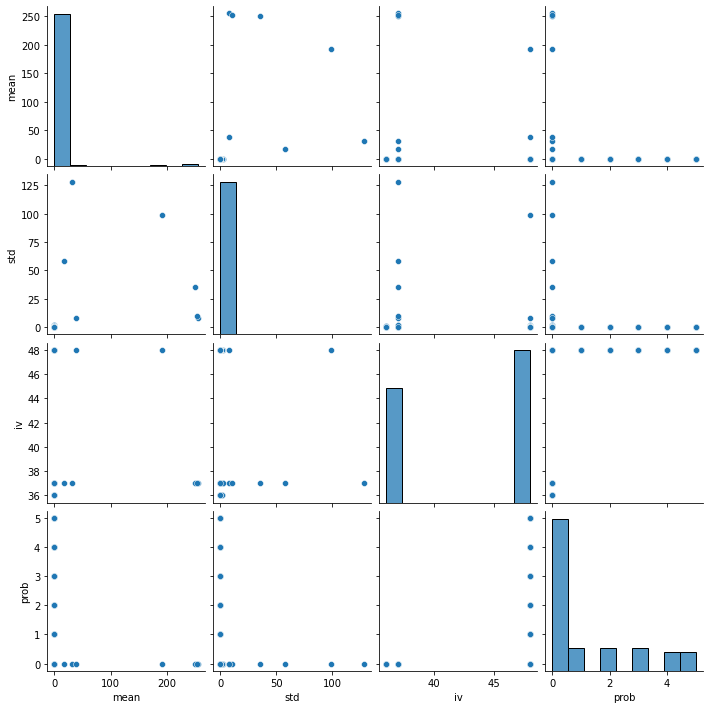

In [71]:
#new_apple5[['prob', 'condor-change', 'start', 'd-strike', 'day']].describe()
sns.pairplot(new_apple6[['mean','std','iv','prob']])
#sns.pairplot(new_apple5[new_apple5['d-strike'] == 3])

In [35]:
start = time.time()
new_apple5 = []
ivol = []

for k in range(13,16):
    new_apple2 = new_apple.reset_index()
    new_apple2 = new_apple2.set_index(['strike-date'])
    print(strike_cols[k])
    new_apple3 = new_apple2.loc[strike_cols[k]]
    
    for day in range(max(new_apple3['time']).days):
    
        new_apple4 = new_apple3[new_apple3['time'].dt.days == day]

        if len(new_apple4) > 0:
            new_apple4 = new_apple4.reset_index()
            iv2 = abs(new_apple4['strike'] - new_apple4['c'])
            iv = new_apple4.loc[iv2.idxmin()]['iv']
            c = new_apple4.loc[iv2.idxmin()]['c']
            date = new_apple4.loc[iv2.idxmin()]['date']
            strike_date = new_apple4.loc[iv2.idxmin()]['strike-date']
            ivol.append([date, iv])

            new_apple2 = new_apple2.reset_index()
            new_apple2 = new_apple2.set_index(['type','strike-date'])
            apple_pivot_call = new_apple2.loc[('Call', strike_cols[k])]
            strike_pivot = apple_pivot_call.pivot_table(columns="strike", values="date", aggfunc=np.count_nonzero)
            strike_value_cols = strike_pivot.columns
            apple_pivot_put = new_apple2.loc[('Put', strike_cols[k])]
            strike_pivot = apple_pivot_put.pivot_table(columns="strike", values="date", aggfunc=np.count_nonzero)
            strike_value_puts = strike_pivot.columns

            cols = strike_value_cols[strike_value_cols > c]

            new_apple2 = new_apple2.reset_index()
            new_apple2 = new_apple2.set_index(['type', 'strike', 'strike-date'])
            deltaStrikes = 3

            for i in range(len(cols)-deltaStrikes):
                minput = abs(strike_value_puts - 2*c + cols[i])
                put = strike_value_puts[minput==min(minput)][0]
                #Calculation for second put (insurance)
                puts = strike_value_puts ==put
                puts2 = np.arange(0,len(puts), 1)
                put2 = strike_value_puts[puts2[puts]-deltaStrikes]

                aCLo = new_apple2.loc[('Call', cols[i], strike_cols[k])].drop_duplicates(subset ="date")[['last', 'date', 'c']]
                aCLo = aCLo.reset_index()
                idx = pd.date_range(min(aCLo['date']), max(aCLo['date']), freq = "D")
                aCLo.index = pd.DatetimeIndex(aCLo.date)
                aCLo = aCLo.reindex(idx,fill_value=None)
                aCLo = aCLo.interpolate(method ='linear', limit_direction ='forward')
                aCLo = aCLo.drop(['type', 'strike-date', 'date'], axis=1)
                aCLo = aCLo.reset_index()
                aCLo.rename(columns = {'last':'priceCLo', 'strike':'strikeCLo', 'index': 'date'}, inplace = True)

                aCHi = new_apple2.loc[('Call', cols[i+deltaStrikes], strike_cols[k])].drop_duplicates(subset ="date")[['last', 'date', 'c']]
                aCHi = aCHi.reset_index()
                idx = pd.date_range(min(aCHi['date']), max(aCHi['date']), freq = "D")
                aCHi.index = pd.DatetimeIndex(aCHi.date)
                aCHi = aCHi.reindex(idx,fill_value=None)
                aCHi = aCHi.interpolate(method ='linear', limit_direction ='forward')
                aCHi = aCHi.drop(['type', 'strike-date', 'date'], axis=1)
                aCHi = aCHi.reset_index()
                aCHi.rename(columns = {'last':'priceCHi', 'strike':'strikeCHi', 'index': 'date'}, inplace = True)

                aPLo = new_apple2.loc[('Put', put2, strike_cols[k])].drop_duplicates(subset ="date")[['last', 'date', 'c']]
                aPLo = aPLo.reset_index()
                idx = pd.date_range(min(aPLo['date']), max(aPLo['date']), freq = "D")
                aPLo.index = pd.DatetimeIndex(aPLo.date)
                aPLo = aPLo.reindex(idx,fill_value=None)
                aPLo = aPLo.interpolate(method ='linear', limit_direction ='forward')
                aPLo = aPLo.drop(['type', 'strike-date', 'date'], axis=1)
                aPLo = aPLo.reset_index()
                aPLo.rename(columns = {'last':'pricePLo', 'strike':'strikePLo', 'index': 'date'}, inplace = True)

                aPHi = new_apple2.loc[('Put', put, strike_cols[k])].drop_duplicates(subset ="date")[['last', 'date', 'c']]
                aPHi = aPHi.reset_index()
                idx = pd.date_range(min(aPHi['date']), max(aPHi['date']), freq = "D")
                aPHi.index = pd.DatetimeIndex(aPHi.date)
                aPHi = aPHi.reindex(idx,fill_value=None)
                aPHi = aPHi.interpolate(method ='linear', limit_direction ='forward')
                aPHi = aPHi.drop(['type', 'strike-date', 'date'], axis=1)
                aPHi = aPHi.reset_index()
                aPHi.rename(columns = {'last':'pricePHi', 'strike':'strikePHi', 'index': 'date'}, inplace = True)

                a = pd.merge(aCLo, aCHi, on=['date', 'c'])
                a = pd.merge(a, aPLo, on=['date', 'c'])
                a = pd.merge(a, aPHi, on=['date', 'c'])
                #a = a.set_index('date')
                a['condor'] = a['priceCLo'] - a['priceCHi'] + a['pricePHi'] - a['pricePLo']
                a['prob'] = (cols[i] - c) / c
                a['strike-date'] = strike_date
                a['condor-change'] = a['condor'].pct_change()
                a = a[a['date'] > date]
                a['start'] = day
                if len(a) >= 5:
                    new_apple5.append(a)

new_apple5 = pd.concat(new_apple5)
new_apple5 = new_apple5.replace([np.inf, -np.inf], np.nan)
ivol = pd.DataFrame(data=ivol, columns=["date", "iv"])
end = time.time()
print(end - start)
    
    

c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\ipykernel_launcher.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\ipykernel_launcher.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.


In [9]:
new_apple = new_apple.reset_index()
strike_pivot = new_apple.pivot_table(columns="strike-date", values="date", aggfunc=np.count_nonzero)
strike_date_cols = strike_pivot.columns
strike_pivot = new_apple.pivot_table(columns="Strike", values="date", aggfunc=np.count_nonzero)
strike_cols = strike_pivot.columns

In [13]:
new_apple2 = new_apple
new_apple2 = new_apple2.set_index(['type', 'strike-date', 'Strike'])

In [19]:
new_apple2.loc['put', strike_date_cols[19], 220]

c:\userdata\z003rvhr\python\yahoo_graber\grab\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


level_0  index       date % Change    Ask     Bid  \
type strike-date Strike                                                      
put  2023-01-20  220.0       298    298 2020-11-19        -    0.0    0.00   
                 220.0       698    698 2020-11-21        -    0.0    0.00   
                 220.0      1093   1093 2020-11-23        -    0.0    0.00   
                 220.0      1493   1493 2020-11-25        -    0.0    0.00   
                 220.0      3128   3128 2020-11-26        -  107.9  106.25   
                 220.0      3947   3947 2020-11-27        -    0.0    0.00   
                 220.0      4342   4342 2020-11-28        -    0.0    0.00   
                 220.0      4737   4737 2020-11-29        -    0.0    0.00   
                 220.0      5028   5028 2020-11-30        -    0.0    0.00   
                 220.0      5319   5319 2020-12-02        -    0.0    0.00   
                 220.0      5714   5714 2020-12-03        -    0.0    0.00   
                 220.0      6109   6109 2020-12-04        -    0.0    0.00   
                 220.0      6400   6400 2020-12-05        -    0.0    0.00   
                 220.0      6691   6691 2020-12-06        -    0.0    0.00   
                 220.0      6982   6982 2020-12-07        -    0.0    0.00   
                 220.0      7273   7273 2020-12-08        -    0.0    0.00   
                 220.0      7780   7780 2020-12-09        -    0.0    0.00   
                 220.0      8071   8071 2020-12-10        -    0.0    0.00   
                 220.0      8362   8362 2020-12-10        -    0.0    0.00   
                 220.0      8653   8653 2020-12-11        -    0.0    0.00   
                 220.0      8944   8944 2020-12-11        -    0.0    0.00   
                 220.0     11861  11861 2020-12-12   +3.48%  103.4  101.35   
                 220.0     14778  14778 2020-12-13   +3.48%  103.4  101.35   
                 220.0     17713  17713 2020-12-15   +2.05%  103.3  101.75   
                 220.0     17908  17908 2020-12-17        -    0.0    0.00   

                        Change        Contract Name Implied Volatility  \
type strike-date Strike                                                  
put  2023-01-20  220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000             34.71%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0       0  AAPL230120P00220000              0.00%   
                 220.0    3.48  AAPL230120P00220000             36.67%   
                 220.0    3.48  AAPL230120P00220000             36.69%   
                 220.0    2.05  AAPL230120P00220000             35.4